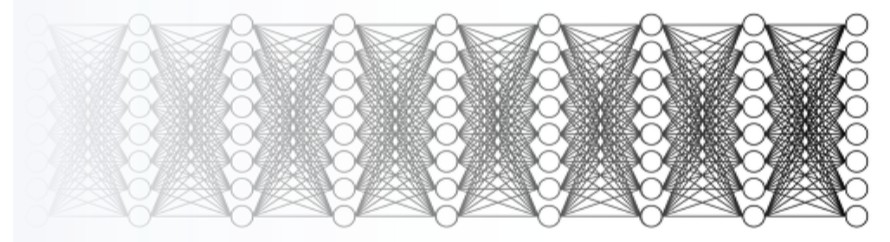

역전파(back propagation) 알고리즘이란 우리의 목푯값과 실제 모델이 예측한 예측값이 얼마나 차이 나는지 구한 후, 오차값을 다시 뒤로 전파해가며 가중치(weight)들을 업데이트하는 과정이라고 배웠습니다.

그러나 깊은 층의 모델에선 역전파시에 전달되는 손실 함수(loss function)의 gradient 값에 활성화 함수인 sigmoid 함수의 0에 가까운 기울기 값이 계속해서 곱해지면서 결국 가중치 업데이트가 잘 안되는 문제가 생기는데, 이것이 바로 기울기 소실 문제(Vanishing Gradient)입니다.

이번 실습에서는 모델의 층이 깊은 경우 히든층의 활성화 함수가 ‘relu’일 때와 ‘sigmoid’일 때의 모델 정확도를 확인해보고, 왜 최근에는 활성화 함수로 sigmoid를 잘 쓰지 않는지 직접 확인해봅시다.

MNIST Dataset
실습에서 활용할 데이터셋은 28x28의 크기를 가진 MNIST 손글씨 데이터셋입니다. MNIST 데이터는 0 ~ 9까지의 손글씨 이미지로 구성되어 있으며 데이터의 label은 0 ~ 9의 정수로 이루어져 있습니다.

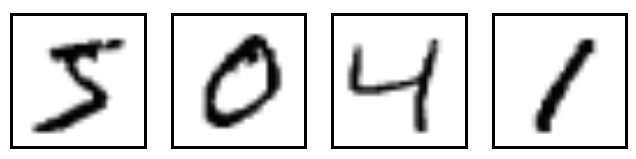

이번 실습에선 MNIST 데이터를 모델의 입력층에서 1차원 데이터로 변환해 사용합니다.

In [ ]:
import tensorflow as tf

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

'''
1. 활성화 함수는 출력층만 그대로 두고 
   나머지 히든층들은 `relu`로 설정하세요.
'''

def make_model_relu():
    
    model_relu = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return model_relu
    
'''
2. 활성화 함수는 출력층만 그대로 두고
   나머지 히든층들은 `sigmoid`로 설정하세요.
'''
    
def make_model_sig():
    
    model_sig = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return model_sig

'''
3. 두 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. model_relu와 model_sig 불러옵니다.
   
   Step02. 두 모델의 최적화 방법과 손실 함수를 
           똑같이 설정합니다.
   
   Step03. 두 모델의 구조를 확인하는 코드를 작성합니다.
           우리가 만든 모델이 얼마나 깊은지 확인해보세요.
   
   Step04. 두 모델을 학습시킵니다. 
           'epochs'는 5로 설정합니다.
           검증용 데이터는 설정하지 않습니다. 
           'verbose'는 0으로 설정합니다.
   
   Step05. 두 모델을 테스트하고 점수를 출력합니다. 
           둘 중 어느 모델의 성능이 더 좋은지 확인해보세요.
'''

def main():
    
    # MNIST 데이터를 불러오고 전처리합니다.
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    model_relu = make_model_relu()  # 히든층들의 활성화 함수로 relu를 쓰는 모델입니다.
    model_sig = make_model_sig()   # 히든층들의 활성화 함수로 sigmoid를 쓰는 모델입니다.
    
    model_relu.compile(None)
    model_sig.compile(None)
    
    None
    None
    
    model_relu_history = None
    print('\n')
    model_sig_history = None
    
    scores_relu = None
    scores_sig = None
    
    print('\naccuracy_relu: ', scores_relu[-1])
    print('accuracy_sig: ', scores_sig[-1])
    
    return model_relu_history, model_sig_history

if __name__ == "__main__":
    main()